# MNIST PCA

Let us first load the MNIST dataset

In [252]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load dataset using tf.keras utils
(x_train, _), (x_test, _) = mnist.load_data()

Then, get `n_images` random samples from the train dataset

In [253]:
# sample n_images mnist digits from train dataset
#n_images = len(x_train)
#images = x_train
n_images = 10000
indexes = np.random.randint(0, x_train.shape[0], size=n_images)
images = x_train[indexes]

Let's plot the first 25 test images

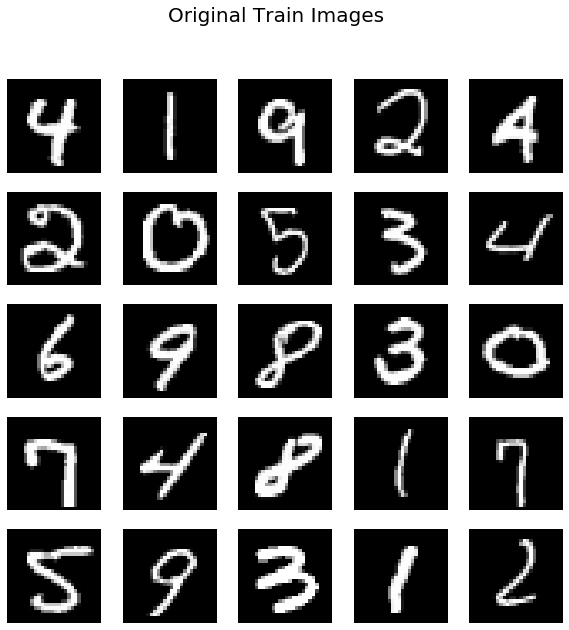

In [254]:
#util function for displaying images in a grid
def plot_images(images, title, n_images=25):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    side = int(math.sqrt(n_images))
    for i in range(n_images):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close('all')
    
title = "Original Train Images"
plot_images(images, title=title)
orig_shape = images.shape

## PCA Algorithm
1. Mean subtraction: 
\begin{equation*}
\textbf{ x }_{n} = \textbf{x}_{n} - \mu
\end{equation*}

In [255]:
images = np.float32(images)
mu = np.mean(images)
images -= mu

2. Divide by standard deviation: 
\begin{equation*}
\textbf{ x }_{n} = \textbf{x}_{n} / \sigma
\end{equation*}

In [256]:
std = np.std(images)
images /= std

Let's print before and after statistics

In [257]:
print("Before mean: {0}, std: {1}".format(mu,std))
mu1 = np.mean(images)
std1 = np.std(images)
print("After mean: {0}, std: {1}".format(mu1,std1))

Before mean: 33.34352111816406, std: 78.61241912841797
After mean: -1.0081943457862508e-07, std: 0.9999997019767761


3. Formulate data matrix and covariance matrix:
\begin{equation}
\textbf{X} = [ \textbf{x}_1, ..., \textbf{x}_n ]
\end{equation}
\begin{equation}
\textbf{S} = \frac{1}{N}\textbf{XX}^T
\end{equation}
and perform Eigendecomposition: \begin{equation}\textbf{S}=\textbf{B}\textbf{D}\textbf{B}^{-1}\end{equation}

In [258]:
#from numpy import linalg as la
from scipy import linalg as la
M = 500 # first m principal components
X = np.reshape(images,(-1,n_images))
S = np.matmul(X, np.transpose(X))/n_images
#D,B = la.eig(S,left=True,right=True)
D,B = la.eig(S,left=True,right=False)
print('X.shape: {0}'.format(X.shape))
print('S.shape: {0}'.format(S.shape))
print(B.shape)
print(D.shape)
#print(A)

X.shape: (784, 10000)
S.shape: (784, 784)
(784, 784)
(784,)


Projection or Low-Rank Approximation of $\textbf{X}$:

\begin{equation}
\textbf{R} = \textbf{B}_{M}\textbf{B}^{T}_{M}\textbf{X}
\end{equation}

In [259]:
BM = B[:,:M]
BM_BMT = np.matmul(BM,np.transpose(BM))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, orig_shape)
print(R.shape)

(10000, 28, 28)


Backprojection:
\begin{equation*}
\textbf{ x }_{n} = \textbf{x}_{n}\sigma + \mu
\end{equation*}

In [260]:
R *= std
R += mu
R = np.clip(R, 0, 255)
mu1 = np.mean(R)
std1 = np.std(R)
print("After PCA mean: {0}, std: {1}".format(mu1,std1))

After PCA mean: 39.729976654052734, std: 68.85200500488281


Plot the images with n principal components 

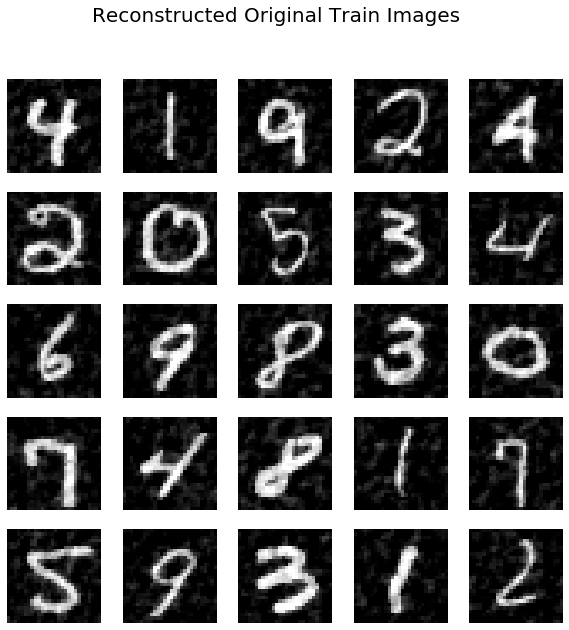

In [261]:
title = "Reconstructed Original Train Images"
plot_images(R, title=title)

## Apply PCA on Test Images

Using the learned basis vectors, let's project the test images.

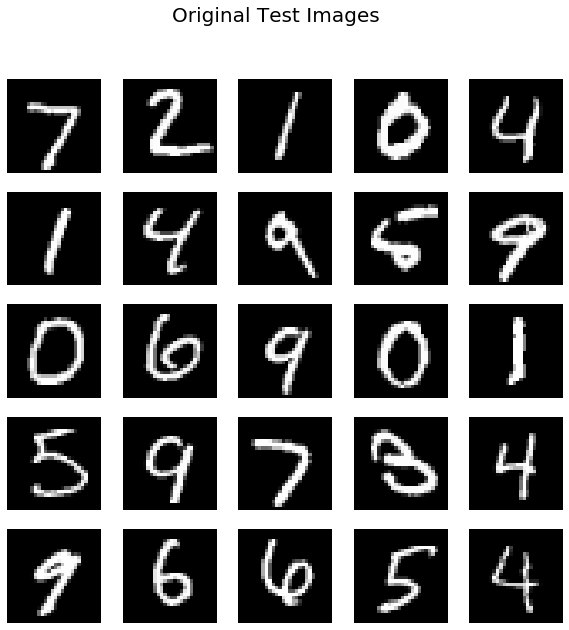

In [262]:
title = "Original Test Images"
plot_images(x_test, title=title)
test_shape = x_test.shape

Plot reconstructed test images

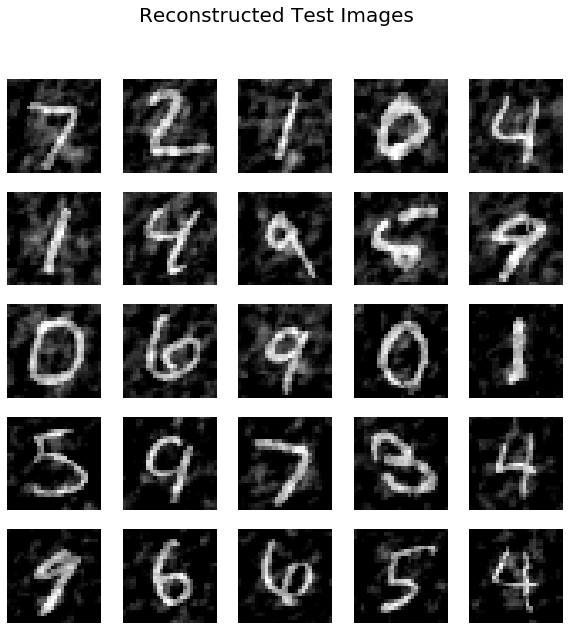

In [263]:
X = np.float32(np.reshape(x_test,(-1,x_test.shape[0])))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, test_shape)
R = np.clip(R, 0, 255)
title = "Reconstructed Test Images"
plot_images(R, title=title)